## House Price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [109]:
# reading the dataset
house = pd.read_csv("train.csv")

In [110]:
# summary of the dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [111]:
# head
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [112]:
house.shape

(1460, 81)

In [113]:
house.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### Drop columns with missing values > 30%

In [114]:
null_perc=house.isna().sum()/len(house.index)*100
null_perc[null_perc>30]

Alley          93.767123
MasVnrType     59.726027
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [115]:
house=house.drop(null_perc[null_perc>30].index,axis=1)

In [116]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Dropping LotFrontage column as it has lot of missing values

In [117]:
house=house.drop('LotFrontage',axis=1)

#### Dropping rows with null values

In [118]:
house=house.dropna()

In [119]:
house.shape

(1338, 74)

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [120]:
# dropping ID column
house = house.drop(['Id'], axis=1)
house.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [121]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [122]:
# correlation matrix
cor = house_numeric.corr()
cor

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.134158,0.051690,-0.098153,0.056456,0.038513,0.031333,-0.069053,-0.079329,-0.141025,...,-0.010175,-0.000359,-0.022598,-0.041391,-0.022748,0.010199,-0.021512,-0.016283,-0.021591,-0.079599
LotArea,-0.134158,1.000000,0.090451,0.001415,-0.005022,0.001681,0.096727,0.210148,0.110493,-0.014589,...,0.167822,0.084942,-0.017968,0.019326,0.038489,0.077050,0.040824,0.000118,-0.012066,0.254757
OverallQual,0.051690,0.090451,1.000000,-0.163080,0.570668,0.549460,0.401175,0.197441,-0.086014,0.292940,...,0.218570,0.307615,-0.116931,0.026470,0.045257,0.064570,-0.029351,0.062641,-0.013949,0.783546
OverallCond,-0.098153,0.001415,-0.163080,1.000000,-0.417330,0.035076,-0.141080,-0.060068,0.035698,-0.161038,...,-0.012947,-0.060429,0.071473,0.023789,0.053759,-0.003544,0.077314,-0.011772,0.056340,-0.108627
YearBuilt,0.056456,-0.005022,0.570668,-0.417330,1.000000,0.617156,0.299410,0.224264,-0.070403,0.147762,...,0.212296,0.216793,-0.385415,0.028982,-0.070809,0.001006,-0.033493,0.004396,-0.007898,0.504297
YearRemodAdd,0.038513,0.001681,0.549460,0.035076,0.617156,1.000000,0.168311,0.099681,-0.085268,0.171881,...,0.201057,0.231129,-0.218452,0.039422,-0.052513,0.003354,-0.001379,0.014552,0.034503,0.501435
MasVnrArea,0.031333,0.096727,0.401175,-0.141080,0.299410,0.168311,1.000000,0.253015,-0.083303,0.104662,...,0.149182,0.129015,-0.112225,0.015221,0.052474,0.009334,-0.028975,-0.013461,-0.001521,0.465811
BsmtFinSF1,-0.069053,0.210148,0.197441,-0.060068,0.224264,0.099681,0.253015,1.000000,-0.064855,-0.552809,...,0.187178,0.107561,-0.105669,0.026811,0.051906,0.142708,0.007869,-0.021242,0.023958,0.359677
BsmtFinSF2,-0.079329,0.110493,-0.086014,0.035698,-0.070403,-0.085268,-0.083303,-0.064855,1.000000,-0.233449,...,0.061206,0.004211,0.045668,-0.031475,0.085865,0.041148,0.006246,-0.022039,0.032855,-0.031226
BsmtUnfSF,-0.141025,-0.014589,0.292940,-0.161038,0.147762,0.171881,0.104662,-0.552809,-0.233449,1.000000,...,-0.020711,0.122171,-0.003372,0.023701,-0.023065,-0.039315,-0.018566,0.031202,-0.039076,0.191689


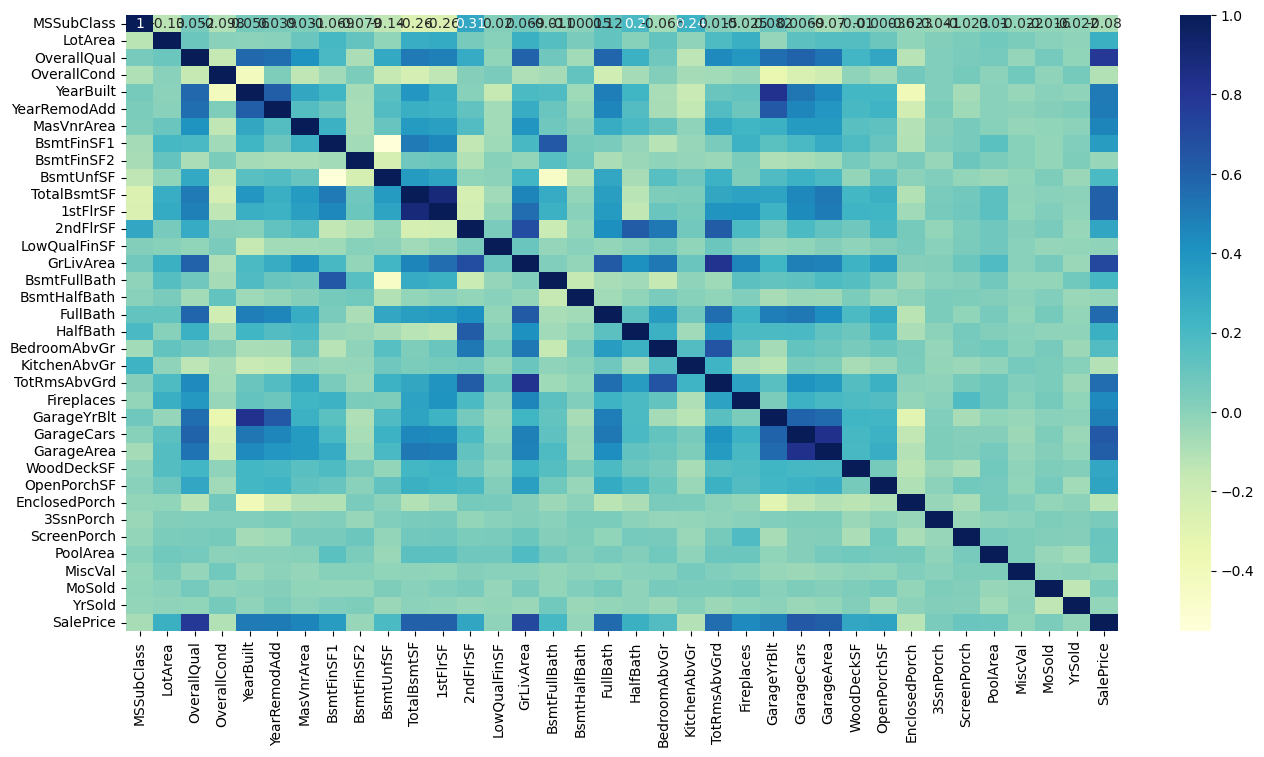

In [123]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except ```symboling```, which should rather be a categorical variable (so that dummy variable are created for the categories).

Note that it *can* be used in the model as a numeric variable also. 

In [124]:
# split into X and y
X = house.loc[:, house.columns]

In [125]:
X = X.drop('SalePrice',axis=1)
y= house['SalePrice']

In [126]:
# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


## 3. Data Preparation 

#### Data Preparation
Let's now prepare the data and build the model.

In [127]:
# subset all categorical variables
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# doing Label Encoding for categorical variables
house_categorical=house_categorical.apply(label_encoder.fit_transform) 

In [128]:
# exclude categorical variables 
X=X.select_dtypes(exclude=['object'])

In [129]:
# concat categorical variables with X
X = pd.concat([X, house_categorical], axis=1)

In [130]:
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,4,2,6,1,1,4,4,2,8,4
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,4,3,6,1,1,4,4,2,8,4
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,4,2,6,1,1,4,4,2,8,4
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,4,2,6,5,2,4,4,2,8,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,4,2,6,1,1,4,4,2,8,4


In [131]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType

In [132]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 4. Model Building and Evaluation

## Linear Regression

Let's now try predicting car prices, a dataset using linear regression.

In [133]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [134]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

187178.59561965812
[-4.79744582e+03  4.85256205e+03  1.16966478e+04  6.44635753e+03
  9.42118706e+03  1.56402292e+03  3.66536920e+03 -9.97641903e+15
 -3.61393670e+15 -9.56670299e+15  8.81876161e+15 -1.26035428e+16
 -1.43533603e+16 -1.32712697e+15  1.69694476e+16  7.94750000e+02
 -3.62000000e+02 -1.02400000e+03 -1.87862500e+03 -4.27250000e+03
 -4.67525000e+03  6.17000000e+03  3.17250000e+03 -3.57600000e+03
  2.51156250e+02  7.92900000e+03  1.28087500e+03 -1.88975000e+03
  7.66000000e+02  4.98250000e+02  1.59510156e+03  5.00137500e+03
 -6.99375000e+01 -1.57000000e+02 -9.44500000e+02 -7.74625000e+02
  2.02240625e+03 -1.05037500e+03  1.58118750e+03 -6.09500000e+02
 -1.63975000e+03  6.42125000e+02  8.14250000e+02 -2.01250000e+03
 -4.55850000e+03  6.66500000e+02 -3.73187500e+02  4.44937500e+02
  2.76712500e+03 -3.02137500e+03  1.97700000e+03 -6.86150000e+03
 -8.00875000e+02  1.05300000e+03 -7.01200000e+03  1.99337500e+03
 -2.91146875e+03  2.36318750e+03  3.88843750e+02 -1.16600000e+03
 -1.60

In [135]:
from sklearn.metrics import r2_score, mean_squared_error

In [136]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8700805066730244
0.6585995114594714
753670177305.1836
858016113799.9238
805203180.8816065
2134368442.2883677


## Ridge and Lasso Regression

Let's now try predicting house prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [137]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [138]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [139]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1776.00881225  3180.85772275  9016.77694301  3076.68458905
  1904.60503542  2462.90967293  4653.32214828  6140.40211883
   262.5146399   -163.35254366  6876.83750513  5643.01643022
  6048.74315798   630.8673748   9356.75890874  2214.30958203
  -207.53439376  2752.13141729  1417.03850303  -230.50496253
 -3078.59921163  5404.10398625  4102.04307071   448.61791596
  3358.19631988  5091.9927696   1977.31406759   893.17537501
   319.93548988   438.09656118  1757.30201864  3306.80918113
    71.24436241   112.77336847  -631.16649148  -464.72887671
  1267.67963964 -1454.88440775   327.53091677  -721.3108636
 -1058.53705571   893.98955552  1158.7991658  -1091.02745245
 -2288.99689338 -1855.92322465  -373.06641377  1260.26713002
  2897.85120525  -504.29255053   231.86360256 -6559.83246038
  -199.57677512  1582.94288761 -6153.37343658  1071.01365015
 -2706.00405596   137.65324979   342.753516    -280.96622175
 -2206.74261173  1406.52693285  -164.43772904 -6646.77579186
  2239.261876     223.095

In [140]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8520580160579292
0.7484756217818987
858219643667.207
632137260398.2605
916901328.704281
1572480747.2593546


## Lasso

In [141]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [142]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1000}


In [143]:
#Fitting Lasso model for alpha = 1000 and printing coefficients which have been penalised

alpha =1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=1000)

In [144]:
lasso.coef_

array([-3523.23363973,  3660.98989477, 13563.74877931,  4071.1692028 ,
        2933.24140002,  1318.86677449,  3336.76908988,  9006.28387876,
           0.        ,    -0.        ,  8308.01850285,     0.        ,
        1507.52518891,     0.        , 25975.55483728,   575.45238072,
          -0.        ,     0.        ,     0.        ,    -0.        ,
       -3262.66868528,  1307.52832721,  2647.70810088,     0.        ,
           0.        ,  7237.39578977,   714.06890171,    -0.        ,
          -0.        ,     0.        ,   897.41536885,  3430.83103447,
           0.        ,    -0.        ,    -0.        ,    -0.        ,
         582.66952725,  -592.7170491 ,   168.67084635,    -0.        ,
        -684.67910312,     0.        ,     0.        ,  -816.33721003,
       -2814.05739811,    -0.        ,    -0.        ,     0.        ,
        2035.86448992,    -0.        ,    -0.        , -7352.97757793,
          -0.        ,   329.7533829 , -7711.27509243,   801.24277609,
      

In [145]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8617531671019495
0.6990841308284332
801977535425.9329
756269171585.1586
856813606.2242873
1881266595.9829814


In [146]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.700805e-01,8.520580e-01,8.617532e-01
1,R2 Score (Test),6.585995e-01,7.484756e-01,6.990841e-01
2,RSS (Train),7.536702e+11,8.582196e+11,8.019775e+11
3,RSS (Test),8.580161e+11,6.321373e+11,7.562692e+11
4,MSE (Train),2.837610e+04,3.028038e+04,2.927138e+04
5,MSE (Test),4.619923e+04,3.965452e+04,4.337357e+04


## Lets observe the changes in the coefficients after regularization

In [147]:
betas = pd.DataFrame(index=X.columns)

In [148]:
betas.rows = X.columns

In [149]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [150]:
pd.set_option('display.max_rows', None)
betas.head(75)

,Linear,Ridge,Lasso
MSSubClass,-4.797446e+03,-1776.008812,-3523.233640
LotArea,4.852562e+03,3180.857723,3660.989895
OverallQual,1.169665e+04,9016.776943,13563.748779
OverallCond,6.446358e+03,3076.684589,4071.169203
YearBuilt,9.421187e+03,1904.605035,2933.241400
YearRemodAdd,1.564023e+03,2462.909673,1318.866774
MasVnrArea,3.665369e+03,4653.322148,3336.769090
BsmtFinSF1,-9.976419e+15,6140.402119,9006.283879
BsmtFinSF2,-3.613937e+15,262.514640,0.000000
BsmtUnfSF,-9.566703e+15,-163.352544,-0.000000
